# Setup

In [205]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import kaleido
import plotly.express as px

In [233]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

# Metadata Dataset

In [78]:
americangut_metadata = pd.read_csv('sample_information_American_gut_microbiome.csv', sep='\t', )

C:\Users\giorg\AppData\Local\Temp\ipykernel_116516\2669532406.py:1: DtypeWarning: Columns (0,26,27,28,29,30,31,56,64,76,78,84,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,168,169,170,171,172,173,174,175,176,177,188,191,192,193,202,205,207,226,236,239,241,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,312,327,348,350,351,352,353,354,355,358,359,360,361,362,363,364,365,366,367,368,369,371,375,382,386,398,404,431,432,433,445,462,497,548,567,571,574,581,582,599,601,602,614,621,633,647,655) have mixed types. Specify dtype option on import or set low_memo

# Data Exploration

In [79]:
americangut_metadata.head()

,sample_name,acid_reflux,acne_medication,acne_medication_otc,add_adhd,age_cat,age_corrected,age_years,alcohol_consumption,alcohol_frequency,...,vioscreen_zinc,vitamin_b_supplement_frequency,vitamin_d_supplement_frequency,vivid_dreams,weight_cat,weight_change,weight_kg,weight_units,whole_eggs,whole_grain_frequency
0,10317.000001000,Not provided,false,false,"Diagnosed by a medical professional (doctor, p...",60s,64.0,64,true,Daily,...,Not provided,Never,Regularly (3-5 times/week),Not provided,NaN,Remained stable,52,kilograms,Never,Occasionally (1-2 times/week)
1,10317.000001001,Not provided,false,false,Not provided,50s,53.0,53.0,true,Rarely (a few times/month),...,Not provided,Not provided,Not provided,Not provided,NaN,Remained stable,110.0,kilograms,Not provided,Not provided
2,10317.000001002,Not provided,false,false,Not provided,50s,53.0,53.0,true,Regularly (3-5 times/week),...,Not provided,Not provided,Not provided,Not provided,NaN,Not provided,56.0,kilograms,Not provided,Not provided
3,10317.000001004,Not provided,false,false,Not provided,40s,44.0,44.0,true,Rarely (a few times/month),...,Not provided,Not provided,Not provided,Not provided,NaN,Remained stable,86.0,kilograms,Not provided,Not provided
4,10317.000001008,Not provided,false,false,Not provided,60s,66.0,66.0,false,Never,...,Not provided,Not provided,Not provided,Not provided,NaN,Increased more than 10 pounds,74.0,kilograms,Not provided,Not provided


## Basic Data Exploration

Let’s have a look at data dimensionality, feature names, and feature types. 

In [80]:
americangut_metadata.shape

(29960, 661)

Now let's try printing out column names using columns:

In [81]:
with open('americangut_columns.txt', 'w') as f:
    for column in americangut_metadata.columns:
        f.write(column + '\n')

Now let's try printing out column dtypes using columns

In [31]:
with open('americangut_types.txt', 'w') as f:
    for column in americangut_metadata.columns:
        f.write(column + '\t' + str(americangut_metadata[column].dtype) + '\n')

In [5]:
print(americangut_metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29960 entries, 0 to 29959
Columns: 661 entries, sample_name to whole_grain_frequency
dtypes: int64(1), object(660)
memory usage: 151.1+ MB
None


The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [15]:
americangut_metadata.describe()


,qiita_study_id
count,29960.0
mean,10317.0
std,0.0
min,10317.0
25%,10317.0
50%,10317.0
75%,10317.0
max,10317.0


Statistics on non-numerical features

In [94]:
americangut_metadata.describe(include=["object", "bool"])

,sample_name,acid_reflux,acne_medication,acne_medication_otc,add_adhd,age_cat,age_corrected,age_years,alcohol_consumption,alcohol_frequency,...,vioscreen_zinc,vitamin_b_supplement_frequency,vitamin_d_supplement_frequency,vivid_dreams,weight_cat,weight_change,weight_kg,weight_units,whole_eggs,whole_grain_frequency
count,29960,29883,29942,29883,29883,29883,29883,29883,29883,29883,...,22731,29883,29883,29883,5649,29883,29883,29883,29883,29872
unique,29960,10,11,10,10,15,195,199,10,11,...,698,11,11,11,5,9,366,5,11,11
top,10317.000001000,I do not have this condition,false,false,I do not have this condition,50s,Not applicable,Not applicable,true,Rarely (a few times/month),...,Not provided,Never,Never,Not provided,Not applicable,Remained stable,Not applicable,kilograms,Occasionally (1-2 times/week),Regularly (3-5 times/week)
freq,1,12088,15212,14218,17948,4562,3598,3598,12192,6106,...,15005,11229,8627,9804,3543,20260,3598,25598,7385,5607


# Feature Selection

From 661 to 78 features related to the research

In [88]:
variables_subset = ['sample_name', 
             'anonymized_name', 
             'age_cat', 
             'age_corrected', 
             'age_years',    
             'birth_year', 
             'qiita_study_id', 
             'race', 
             'scientific_name', 
             'host_common_name',    
             'env_package', 
             'sex', 
             'description', 
             'dna_extracted', 
             'subset_healthy',    
             'exercise_frequency', 
             'exercise_location', 
             'vioscreen_hei_score',    
             'vioscreen_hei2010_score', 
             'bmi', 
             'bmi_cat', 
             'bmi_corrected', 
             'country',    
             'country_of_birth', 
             'country_residence', 
             'level_of_education', 
             'collection_date',    
             'collection_date_only', 
             'collection_month', 
             'collection_season', 
             'collection_time',    
             'collection_timestamp',    
             'pm_lifestyle_change_how_change_in_diet_ie_taking_a_probiotic',
             'pm_participation_reason_i_have_gastrointestinal_problems',
             "pm_shared_pcp_changes_what_change_in_behaviorallifestyle_recommendations_eg_start_probiotic",    
             "probiotic_frequency",    
             "migraine",    
             "antibiotic_history",    
             "subset_antibiotic_history",    
             "vioscreen_d_yogurt",    
             "fermented_frequency",    
             "fermented_increased",    
             "fermented_other",      
             "vioscreen_omega3",       
             "ibd",    
             "ibd_diagnosis",    
             "ibd_diagnosis_refined",    
             "ibs",    
             "gluten",
             "fermented_consumed_yogurtlassi",    
             "fermented_consumed_kefir_milk",    
             "fermented_consumed_kefir_water",    
             "fermented_consumed_kombucha",    
             "fermented_produce_commercial_kombucha",    
             "fermented_consumed_fermented_beansmisonatto",    
             "fermented_consumed_pickled_vegetables",    
             "fermented_consumed_kimchi",    
             "fermented_consumed_tempeh",    
             "fermented_consumed_fermented_breadsourdoughinjera",    
             "pm_gastro_problems",    
             "pm_gastro_problems_crohns_disease_or_ulcerative_colitis",    
             "pm_gastro_problems_frequent_more_than_once_a_week_constipation",    
             "pm_gastro_problems_frequent_more_than_once_a_week_diarrhea",    
             "pm_gastro_problems_gastrointestinal_cancer",    
             "pm_gastro_problems_i_have_had_surgery_on_my_intestines",    
             "pm_gastro_problems_irritable_bowel_syndrome_ibs",    
             "pm_gastro_problems_other",    
             "pm_gastro_problems_unspecified"]


In [127]:
variables_subset1 = ['sample_name', 
             'anonymized_name', 
             'age_cat', 
             'age_corrected',     
             'race', 
             'scientific_name', 
             'host_common_name',    
             'env_package', 
             'sex', 
             'dna_extracted',  
             'bmi', 
             'bmi_cat', 
             'bmi_corrected', 
             'country',     
             'level_of_education', 
             'collection_date',          
             "probiotic_frequency",    
             "migraine",    
             "antibiotic_history",    
             "subset_antibiotic_history",        
             "fermented_frequency",    
             "fermented_increased",       
             "ibd",    
             "ibd_diagnosis",    
             "ibd_diagnosis_refined",    
             "ibs",    
             "gluten",]

In [177]:
# Select only the variables of interest from the metadata
americangut_metadata_subset = americangut_metadata[variables_subset1]

In [129]:
americangut_metadata_subset.head()

,sample_name,anonymized_name,age_cat,age_corrected,qiita_study_id,race,scientific_name,host_common_name,env_package,sex,...,migraine,antibiotic_history,subset_antibiotic_history,fermented_frequency,fermented_increased,ibd,ibd_diagnosis,ibd_diagnosis_refined,ibs,gluten
0,10317.000001000,000001000,60s,64.0,10317,Caucasian,human gut metagenome,human,human-gut,female,...,I do not have this condition,6 months,False,NaN,NaN,I do not have this condition,Not provided,Not provided,I do not have this condition,No
1,10317.000001001,000001001,50s,53.0,10317,Caucasian,human gut metagenome,human,human-gut,male,...,I do not have this condition,I have not taken antibiotics in the past year.,True,NaN,NaN,I do not have this condition,Not provided,Not provided,Not provided,No
2,10317.000001002,000001002,50s,53.0,10317,Not provided,human gut metagenome,human,human-gut,female,...,I do not have this condition,Not provided,False,NaN,NaN,Not provided,Not provided,Not provided,Not provided,Not provided
3,10317.000001004,000001004,40s,44.0,10317,Caucasian,human gut metagenome,human,human-gut,female,...,I do not have this condition,I have not taken antibiotics in the past year.,True,NaN,NaN,I do not have this condition,Not provided,Not provided,Not provided,Not provided
4,10317.000001008,000001008,60s,66.0,10317,Caucasian,human gut metagenome,human,human-gut,female,...,I do not have this condition,I have not taken antibiotics in the past year.,True,NaN,NaN,I do not have this condition,Not provided,Not provided,Not provided,No


In [130]:
americangut_metadata_subset.columns

Index(['sample_name', 'anonymized_name', 'age_cat', 'age_corrected',
       'qiita_study_id', 'race', 'scientific_name', 'host_common_name',
       'env_package', 'sex', 'dna_extracted', 'bmi', 'bmi_cat',
       'bmi_corrected', 'country', 'level_of_education', 'collection_date',
       'probiotic_frequency', 'migraine', 'antibiotic_history',
       'subset_antibiotic_history', 'fermented_frequency',
       'fermented_increased', 'ibd', 'ibd_diagnosis', 'ibd_diagnosis_refined',
       'ibs', 'gluten'],
      dtype='object')

# Data Cleaning

## Subsetting

Selecting only gut microbiota sample.
From 29960 to 22293 instances.

In [178]:
americangut_metadata_subset = americangut_metadata_subset[americangut_metadata_subset['scientific_name'] == 'human gut metagenome']
americangut_metadata_subset['scientific_name'].value_counts(dropna=False)

human gut metagenome    22293
Name: scientific_name, dtype: int64

## Remove ID Duplicates and Nulls

### Sample Name

No duplicates or Nan values

In [179]:
# print the number of duplicate values in sample_name variabile
print(americangut_metadata_subset['sample_name'].duplicated().sum())
# print number of null values in sample_name variabile
print(americangut_metadata_subset['sample_name'].isnull().sum())

0
0


### anonymized_name

In [180]:
# prnt the number of duplicate values in anonymized_name variabile
print(americangut_metadata_subset['anonymized_name'].duplicated().sum())
# print the first all differente duplicated values in anonymized_name variabile
print(americangut_metadata_subset[americangut_metadata_subset['anonymized_name'].duplicated(keep=False)]['anonymized_name'].value_counts())
# remove the duplicated values in anonymized_name variabile
americangut_metadata_subset = americangut_metadata_subset.drop_duplicates(subset='anonymized_name', keep='first')
# print the number of duplicate values in anonymized_name variabile
print(americangut_metadata_subset['anonymized_name'].duplicated().sum())

11
86636    11
Name: anonymized_name, dtype: int64
0


In [181]:
# print the number of null values in anonymized_name variabile
print(americangut_metadata_subset['anonymized_name'].isnull().sum())
# remove null values in anonymized_name variabile
americangut_metadata_subset = americangut_metadata_subset.dropna(subset=['anonymized_name'])
# print the number of null values in anonymized_name variabile
print(americangut_metadata_subset['anonymized_name'].isnull().sum())

1
0


## Normalization

### Exploration

The output shows the column name, followed by the top 10 most frequent unique duplicated values for non-numeric columns. It then prints the number of missing values for each variable, denoted by the Missing values: label. If a column has no missing values, the count will be 0.

In [182]:
for col in americangut_metadata_subset.columns:
    # Check if the column has non-numeric data
    if americangut_metadata_subset[col].dtype == 'object':
        # Find all the unique duplicated values in the column
        duplicated_values = americangut_metadata_subset[americangut_metadata_subset[col].duplicated(keep=False)][col]
        # Print the top 10 most frequent duplicated values
        print(f"{col}:")
        print(duplicated_values.value_counts().nlargest(10))
        # Print the number of missing values
        print(f"Missing values: {americangut_metadata_subset[col].isna().sum()}")
        print()
    else:
        # Print the number of missing values for numeric columns
        print(f"{col}:")
        print(f"Missing values: {americangut_metadata_subset[col].isna().sum()}")
        print()

sample_name:
Series([], Name: sample_name, dtype: int64)
Missing values: 0

anonymized_name:
Series([], Name: anonymized_name, dtype: int64)
Missing values: 0

age_cat:
50s             4172
40s             3962
60s             3953
30s             3718
20s             1955
70+             1440
child            949
Not provided     895
Unspecified      736
teen             487
Name: age_cat, dtype: int64
Missing values: 5

age_corrected:
Not provided    906
Unspecified     736
60.0            399
53.0            396
68.0            390
37.0            389
48.0            387
33.0            381
51.0            378
34.0            369
Name: age_corrected, dtype: int64
Missing values: 5

qiita_study_id:
Missing values: 0

race:
Caucasian                    19108
Asian or Pacific Islander     1110
Other                          740
Hispanic                       542
Not provided                   372
Unspecified                    242
African American               159
not collected       

### Normalize NA values

Replace:
- Not provided
- Unspecified
- unspecified
- not collected
- LabControl test

With null values

In [183]:
values_to_replace = ['Not provided', 'Unspecified', 'not collected', 'LabControl test', 'unspecified']

# Replace the specified values with NaN for all columns in the DataFrame
americangut_metadata_subset.replace(to_replace=values_to_replace, value=np.nan, inplace=True)

#### Check

In [327]:
for col in americangut_metadata_subset.columns:
    # Check if the column has non-numeric data
    if americangut_metadata_subset[col].dtype == 'object':
        # Find all the unique duplicated values in the column
        duplicated_values = americangut_metadata_subset[americangut_metadata_subset[col].duplicated(keep=False)][col]
        # Print the top 10 most frequent duplicated values
        print(f"{col}:")
        print(duplicated_values.value_counts().nlargest(10))
        # Print the number of missing values
        print(f"Missing values: {americangut_metadata_subset[col].isna().sum()}")
        print()
    else:
        # Print the number of missing values for numeric columns
        print(f"{col}:")
        print(f"Missing values: {americangut_metadata_subset[col].isna().sum()}")
        print()

sample_name:
Series([], Name: sample_name, dtype: int64)
Missing values: 0

anonymized_name:
Series([], Name: anonymized_name, dtype: int64)
Missing values: 0

age_cat:
Missing values: 1637

age_corrected:
Missing values: 1648

race:
Caucasian                    19098
Asian or Pacific Islander     1108
Other                          740
Hispanic                       541
African American               159
Name: race, dtype: int64
Missing values: 622

scientific_name:
human gut metagenome    22268
Name: scientific_name, dtype: int64
Missing values: 0

env_package:
human-gut    22021
air            247
Name: env_package, dtype: int64
Missing values: 0

sex:
female    11415
male      10017
Name: sex, dtype: int64
Missing values: 836

bmi:
Missing values: 839

bmi_cat:
Missing values: 1274

bmi_corrected:
Missing values: 7767

country:
USA               14367
United Kingdom     5698
Australia           503
Canada              407
Philippines          96
Ireland              95
Switzerland 

### Normalize boolean features (subset_antibiotic_history)

In [185]:
# definisci la funzione di trasformazione
def bool_transform(value):
    if isinstance(value, str):
        value = value.strip().lower()
        if value == "true" or value == "yes":
            return True
        elif value == "false":
            return False
    return None

# applica la funzione di trasformazione alla colonna subset_antibiotic_history
americangut_metadata_subset["subset_antibiotic_history"] = americangut_metadata_subset["subset_antibiotic_history"].apply(bool_transform)
americangut_metadata_subset["dna_extracted"] = americangut_metadata_subset["dna_extracted"].apply(bool_transform)

In [186]:
# print the number of True, False and null values in subset_antibiotic_history variabile
print(americangut_metadata_subset['subset_antibiotic_history'].value_counts(dropna=False))

True     9535
None     7703
False    5043
Name: subset_antibiotic_history, dtype: int64


### Drop unuseful columns

In [187]:
### Drop columns qiita_study_id, host_common_name, dna_extracted
americangut_metadata_subset = americangut_metadata_subset.drop(columns=['host_common_name', 'dna_extracted', 'qiita_study_id', "subset_antibiotic_history"])

In [272]:
americangut_metadata_subset = americangut_metadata_subset[americangut_metadata_subset["sex"] != "other"]

### Other form of normalization

In [188]:
def mapper(mapping, value):
    return mapping.get(value, value)
from functools import partial

**Level of education** normalization

In [189]:
education_values_fix = {'Did not complete high school': 'Did not complete high school',
                        'High School or GED equilivant': 'High School or GED equilivant',
                        'Some college or technical school': 'Some college or technical school',
                        "Associate's degree": "Associate's degree",
                        "Bachelor's degree": "Bachelor's degree",
                        "Some graduate school or professional": "Bachelor's degree",
                        "Graduate or Professional degree": "Graduate or Professional degree"
                        }
education_map = partial(mapper, education_values_fix)
americangut_metadata_subset['level_of_education'] = americangut_metadata_subset['level_of_education'].apply(education_map)

**Boolean features** creation

In [190]:
migraine_values_fix = {"Crohn's disease": "I suffer from migraine",
                  "Diagnosed by a medical professional (doctor, physician assistant)": "I suffer from migraine",
                  "Diagnosed by an alternative medicine practitioner": "I suffer from migraine",
                  "I do not have this condition": "I do not suffer from migraine",
                  "Self-diagnosed": "I suffer from migraine"}

ibd_values_fix = {"Crohn's disease": "I have an IBD",
                  "Diagnosed by a medical professional (doctor, physician assistant)": "I have IBD",
                  "Diagnosed by an alternative medicine practitioner": "I have IBD",
                  "I do not have this condition": "I do not have IBD",
                  "I do not have IBD": "I do not have IBD",
                  "Ulcerative colitis": "I have IBD",
                  "Self-diagnosed": "I have IBD"}

ibs_values_fix = {"Crohn's disease": "I have an IBD",
                  "Diagnosed by a medical professional (doctor, physician assistant)": "I have IBD",
                  "Diagnosed by an alternative medicine practitioner": "I have IBD",
                  "I do not have this condition": "I do not have IBD",
                  "I do not have IBD": "I do not have IBD",
                  "Ulcerative colitis": "I have IBD",
                  "Self-diagnosed": "I have IBD"}

probiotic_frequency_fix = {'Daily': 'I assume probiotics',
                            'Never': 'I do not assume probiotics',
                            'Occasionally (1-2 times/week)': 'I assume probiotics',
                            'Rarely (a few times/month)': 'I assume probiotics',
                            'Rarely (few times/month)': 'I assume probiotics',
                            'Regularly (3-5 times/week)': 'I assume probiotics'}

fermented_frequency_fix = {'Daily': 'I consume fermented foods',
                            'Never': 'I do not consume fermented foods',
                            'Occasionally (1-2 times/week)': 'I consume fermented foods',
                            'Rarely (a few times/month)': 'I consume fermented foods',
                            'Rarely (few times/month)': 'I consume fermented foods',
                            'Regularly (3-5 times/week)': 'I consume fermented foods'}

gluten_fix = {'No': 'I do not have gluten sensitivity',
                'I do not eat gluten because it makes me feel bad': 'Gluten sensitivity',
                'I was diagnosed with gluten allergy (anti-gluten IgG), but not celiac disease': 'Gluten Allergy (anti-gluten IgG)',
                'I was diagnosed with celiac disease': 'Celiac disease'}

migraine_map = partial(mapper, migraine_values_fix)
americangut_metadata_subset['migraine_bool'] = americangut_metadata_subset['migraine'].apply(migraine_map)

ibd_map = partial(mapper, ibd_values_fix)
americangut_metadata_subset['ibd_bool'] = americangut_metadata_subset['ibd'].apply(ibd_map)

ibs_map = partial(mapper, ibs_values_fix)
americangut_metadata_subset['ibs_bool'] = americangut_metadata_subset['ibs'].apply(ibs_map)

probiotic_frequency_map = partial(mapper, probiotic_frequency_fix)
americangut_metadata_subset['probiotic_frequency_bool'] = americangut_metadata_subset['probiotic_frequency'].apply(probiotic_frequency_map)

fermented_frequency_map = partial(mapper, fermented_frequency_fix)
americangut_metadata_subset['fermented_frequency_bool'] = americangut_metadata_subset['fermented_frequency'].apply(fermented_frequency_map)

# Gluten fix
gluten_map = partial(mapper, gluten_fix)
americangut_metadata_subset['gluten'] = americangut_metadata_subset['gluten'].apply(gluten_map)


In [191]:
for col in americangut_metadata_subset.columns:
    # Check if the column has non-numeric data
    if americangut_metadata_subset[col].dtype == 'object':
        # Find all the unique duplicated values in the column
        duplicated_values = americangut_metadata_subset[americangut_metadata_subset[col].duplicated(keep=False)][col]
        # Print the top 10 most frequent duplicated values
        print(f"{col}:")
        print(duplicated_values.value_counts().nlargest(10))
        # Print the number of missing values
        print(f"Missing values: {americangut_metadata_subset[col].isna().sum()}")
        print()
    else:
        # Print the number of missing values for numeric columns
        print(f"{col}:")
        print(f"Missing values: {americangut_metadata_subset[col].isna().sum()}")
        print()

sample_name:
Series([], Name: sample_name, dtype: int64)
Missing values: 0

anonymized_name:
Series([], Name: anonymized_name, dtype: int64)
Missing values: 0

age_cat:
50s      4172
40s      3962
60s      3953
30s      3718
20s      1955
70+      1440
child     949
teen      487
baby        6
Name: age_cat, dtype: int64
Missing values: 1639

age_corrected:
60.0    399
53.0    396
68.0    390
37.0    389
48.0    387
33.0    381
51.0    378
34.0    369
42.0    369
57.0    368
Name: age_corrected, dtype: int64
Missing values: 1650

race:
Caucasian                    19108
Asian or Pacific Islander     1110
Other                          740
Hispanic                       542
African American               159
Name: race, dtype: int64
Missing values: 622

scientific_name:
human gut metagenome    22281
Name: scientific_name, dtype: int64
Missing values: 0

env_package:
human-gut    22034
air            247
Name: env_package, dtype: int64
Missing values: 0

sex:
female    11415
male      10

## Dtype conversion

In [200]:
# print dtypes of americangut_metadata_subset variabiles
print(americangut_metadata_subset.dtypes)

sample_name                   object
anonymized_name               object
age_cat                     category
age_corrected                float64
race                          object
scientific_name               object
env_package                   object
sex                           object
bmi                          float64
bmi_cat                     category
bmi_corrected                float64
country                       object
level_of_education          category
collection_date               object
probiotic_frequency         category
migraine                      object
antibiotic_history          category
fermented_frequency         category
fermented_increased           object
ibd                           object
ibd_diagnosis                 object
ibd_diagnosis_refined         object
ibs                           object
gluten                        object
migraine_bool                 object
ibd_bool                      object
ibs_bool                      object
p

### Simple dtypes conversion

Oro voglio che converti il tipo delle seguenti features:
- age_corrected deve diventare di tipo intero
- bmi, bmi_corrected deve diventare di tipo float
- collection_date deve diventare di tipo data (formato è tipo 2/26/19)

In [198]:
# converte la colonna age_corrected in intero
americangut_metadata_subset["age_corrected"] = americangut_metadata_subset["age_corrected"].astype(float)

# converte le colonne bmi e bmi_corrected in float
americangut_metadata_subset["bmi"] = americangut_metadata_subset["bmi"].astype(float)
americangut_metadata_subset["bmi_corrected"] = americangut_metadata_subset["bmi_corrected"].astype(float)

# converte la colonna collection_date in data
# americangut_metadata_subset["collection_date"] = pd.to_datetime(americangut_metadata_subset["collection_date"], format="%m/%d/%y")


#### Ordinal categories creation

Ora ci sono alcune variabili di tipo object che devi convertire in categoriche ordinali, pensaci tu a trovare l'ordine corretto:

In [199]:
age_cat_order = ["baby", "child", "teen", "20s", "30s", "40s", "50s", "60s", "70+"]
bmi_cat_order = ["Underweight", "Normal", "Overweight", "Obese"]
level_of_education_order = ["Did not complete high school", "High School or GED equilivant", 
                            "Some college or technical school", "Associate's degree", 
                            "Bachelor's degree", "Graduate or Professional degree"]
probiotic_frequency_order = ["Never", "Rarely (a few times/month)", "Occasionally (1-2 times/week)", 
                             "Regularly (3-5 times/week)", "Daily"]
antibiotic_history_order = ["Week", "Month", "6 months", "Year", 
                            "I have not taken antibiotics in the past year."]
fermented_frequency_order = ["Never", "Rarely (a few times/month)", "Occasionally (1-2 times/week)", 
                             "Regularly (3-5 times/week)", "Daily"]

# converte le variabili di tipo "object" in "categorical" ordinali
americangut_metadata_subset["age_cat"] = pd.Categorical(americangut_metadata_subset["age_cat"], categories=age_cat_order, ordered=True)
americangut_metadata_subset["bmi_cat"] = pd.Categorical(americangut_metadata_subset["bmi_cat"], categories=bmi_cat_order, ordered=True)
americangut_metadata_subset["level_of_education"] = pd.Categorical(americangut_metadata_subset["level_of_education"], categories=level_of_education_order, ordered=True)
americangut_metadata_subset["probiotic_frequency"] = pd.Categorical(americangut_metadata_subset["probiotic_frequency"], categories=probiotic_frequency_order, ordered=True)
americangut_metadata_subset["antibiotic_history"] = pd.Categorical(americangut_metadata_subset["antibiotic_history"], categories=antibiotic_history_order, ordered=True)
americangut_metadata_subset["fermented_frequency"] = pd.Categorical(americangut_metadata_subset["fermented_frequency"], categories=fermented_frequency_order, ordered=True)

In [202]:
for col_name in americangut_metadata_subset.select_dtypes(include='category').columns:
    print(col_name, ":")
    print(americangut_metadata_subset[col_name].cat.categories)
    print("\n")

age_cat :
Index(['baby', 'child', 'teen', '20s', '30s', '40s', '50s', '60s', '70+'], dtype='object')


bmi_cat :
Index(['Underweight', 'Normal', 'Overweight', 'Obese'], dtype='object')


level_of_education :
Index(['Did not complete high school', 'High School or GED equilivant',
       'Some college or technical school', 'Associate's degree',
       'Bachelor's degree', 'Graduate or Professional degree'],
      dtype='object')


probiotic_frequency :
Index(['Never', 'Rarely (a few times/month)', 'Occasionally (1-2 times/week)',
       'Regularly (3-5 times/week)', 'Daily'],
      dtype='object')


antibiotic_history :
Index(['Week', 'Month', '6 months', 'Year',
       'I have not taken antibiotics in the past year.'],
      dtype='object')


fermented_frequency :
Index(['Never', 'Rarely (a few times/month)', 'Occasionally (1-2 times/week)',
       'Regularly (3-5 times/week)', 'Daily'],
      dtype='object')




## Save

In [274]:
americangut_metadata_subset.to_csv("american_gut_processed.csv", index=False)

# Variables and data visualization

In [208]:
print(americangut_metadata_subset.dtypes)

sample_name                   object
anonymized_name               object
age_cat                     category
age_corrected                float64
race                          object
scientific_name               object
env_package                   object
sex                           object
bmi                          float64
bmi_cat                     category
bmi_corrected                float64
country                       object
level_of_education          category
collection_date               object
probiotic_frequency         category
migraine                      object
antibiotic_history          category
fermented_frequency         category
fermented_increased           object
ibd                           object
ibd_diagnosis                 object
ibd_diagnosis_refined         object
ibs                           object
gluten                        object
migraine_bool                 object
ibd_bool                      object
ibs_bool                      object
p

In [207]:
pd.set_option("display.max_columns", None)
americangut_metadata_subset.head()

,sample_name,anonymized_name,age_cat,age_corrected,race,scientific_name,env_package,sex,bmi,bmi_cat,bmi_corrected,country,level_of_education,collection_date,probiotic_frequency,migraine,antibiotic_history,fermented_frequency,fermented_increased,ibd,ibd_diagnosis,ibd_diagnosis_refined,ibs,gluten,migraine_bool,ibd_bool,ibs_bool,probiotic_frequency_bool,fermented_frequency_bool
0,10317.000001000,000001000,60s,64.0,Caucasian,human gut metagenome,human-gut,female,21.92,Normal,21.92,USA,Bachelor's degree,NaN,Never,I do not have this condition,6 months,NaN,NaN,I do not have this condition,NaN,NaN,I do not have this condition,I consume fermented foods,I do not suffer from migraine,I do not have IBD,I do not have IBD,I do not assume probiotics,NaN
1,10317.000001001,000001001,50s,53.0,Caucasian,human gut metagenome,human-gut,male,35.92,Obese,NaN,USA,NaN,NaN,NaN,I do not have this condition,I have not taken antibiotics in the past year.,NaN,NaN,I do not have this condition,NaN,NaN,NaN,I consume fermented foods,I do not suffer from migraine,I do not have IBD,NaN,NaN,NaN
2,10317.000001002,000001002,50s,53.0,NaN,human gut metagenome,human-gut,female,19.84,Normal,NaN,USA,NaN,NaN,NaN,I do not have this condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not suffer from migraine,NaN,NaN,NaN,NaN
3,10317.000001004,000001004,40s,44.0,Caucasian,human gut metagenome,human-gut,female,34.89,Obese,NaN,USA,NaN,NaN,NaN,I do not have this condition,I have not taken antibiotics in the past year.,NaN,NaN,I do not have this condition,NaN,NaN,NaN,NaN,I do not suffer from migraine,I do not have IBD,NaN,NaN,NaN
4,10317.000001008,000001008,60s,66.0,Caucasian,human gut metagenome,human-gut,female,30.02,Obese,NaN,USA,NaN,NaN,NaN,I do not have this condition,I have not taken antibiotics in the past year.,NaN,NaN,I do not have this condition,NaN,NaN,NaN,I consume fermented foods,I do not suffer from migraine,I do not have IBD,NaN,NaN,NaN


## General sample descriptors

In [215]:
%matplotlib inline
import matplotlib.pyplot as plt

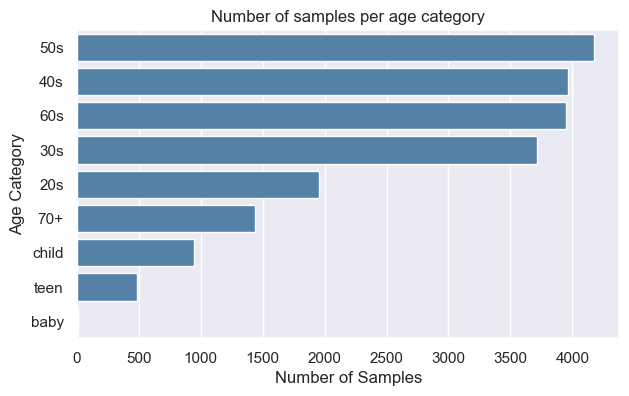

In [240]:
# Create a barplot using seaborn on the americangut_metadata_subset dataframe
# showing the number of samples per age category
plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.countplot(data=americangut_metadata_subset, 
                   y="age_cat", 
                   color='steelblue',
                   order = americangut_metadata_subset['age_cat'].value_counts().index)
plt.title(f'Number of samples per age category')
ax.set(xlabel='Number of Samples', ylabel='Age Category')
plt.show()

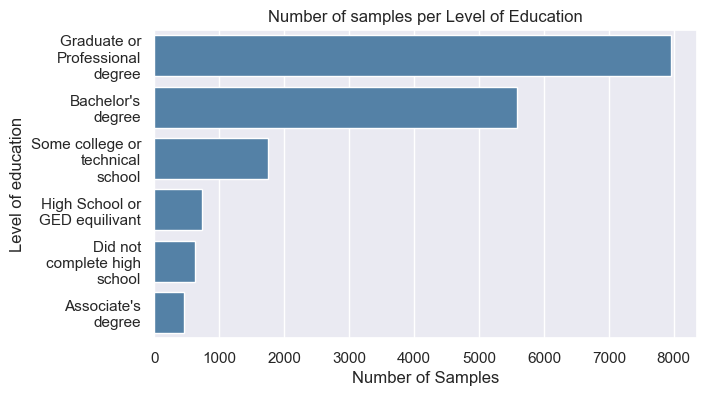

In [239]:
plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.countplot(data=americangut_metadata_subset, 
                   y="level_of_education", 
                   color='steelblue',
                   order = americangut_metadata_subset['level_of_education'].value_counts().index)
plt.title(f'Number of samples per Level of Education')
ax.set(xlabel='Number of Samples', ylabel='Level of education')
wrap_labels(ax, 15)
plt.show()

C:\Users\giorg\AppData\Local\Temp\ipykernel_116516\1904323493.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation=0)


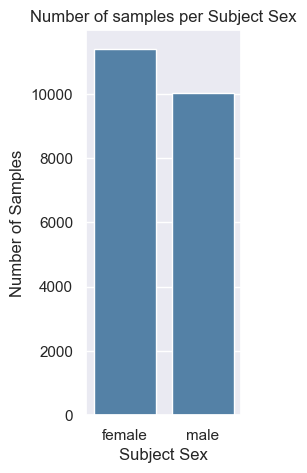

In [262]:
grouped_data_c = americangut_metadata_subset.groupby(['sex']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(2, 'nSamples')

plt.figure(figsize=(2, 5), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="nSamples", 
                   x = 'sex',
                   color='steelblue')
plt.title(f'Number of samples per Subject Sex')
ax.set(xlabel='Subject Sex', ylabel='Number of Samples')
wrap_labels(ax, 15)
plt.show()

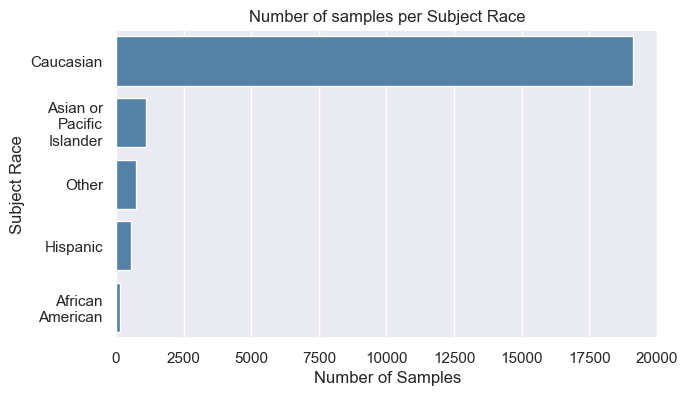

In [255]:
grouped_data_c = americangut_metadata_subset.groupby(['race']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(5, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="race", 
                   x = 'nSamples',
                   color='steelblue')
plt.title(f'Number of samples per Subject Race')
ax.set(xlabel='Number of Samples', ylabel='Subject Race')
wrap_labels(ax, 15)
plt.show()

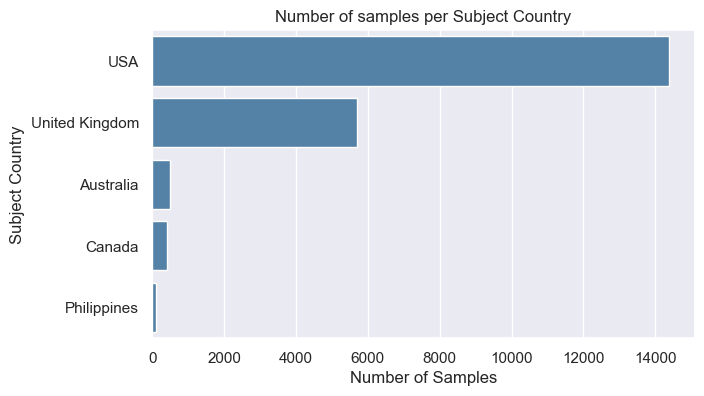

In [252]:
grouped_data_c = americangut_metadata_subset.groupby(['country']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(5, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="country", 
                   x = 'nSamples',
                   color='steelblue')
plt.title(f'Number of samples per Subject Country')
ax.set(xlabel='Number of Samples', ylabel='Subject Country')
wrap_labels(ax, 15)
plt.show()

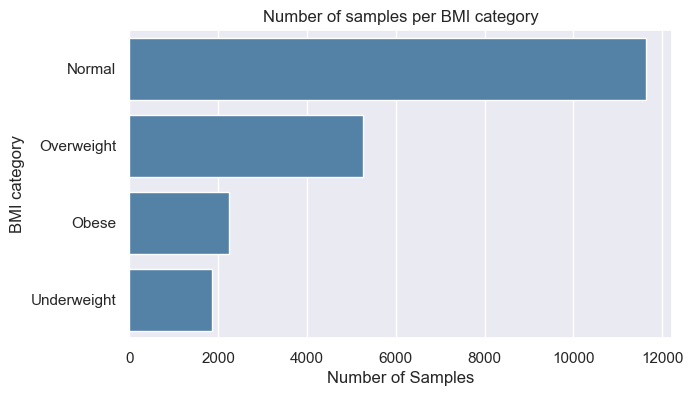

In [282]:
grouped_data_c = americangut_metadata_subset.groupby(['bmi_cat']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="bmi_cat", 
                   x = 'nSamples',
                   color='steelblue',
                   order = ["Normal", "Overweight", "Obese", "Underweight"])
plt.title(f'Number of samples per BMI category')
ax.set(xlabel='Number of Samples', ylabel='BMI category')
wrap_labels(ax, 15)
plt.show()

<Figure size 700x700 with 0 Axes>

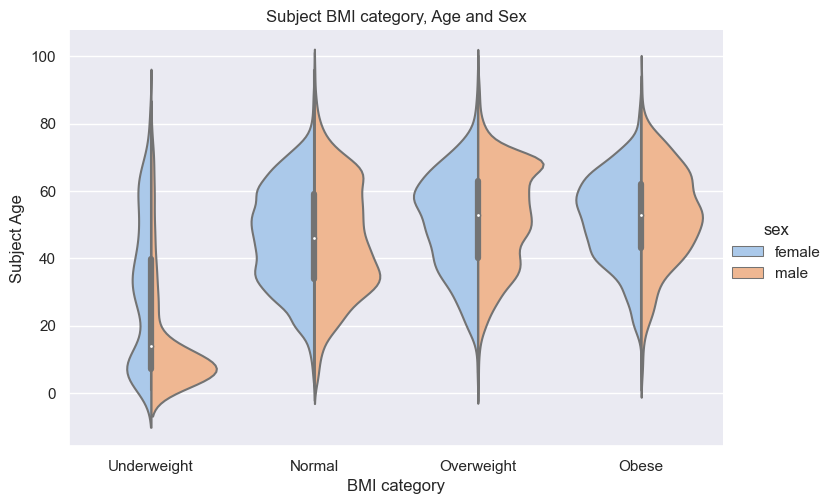

In [293]:
sns.set(style='darkgrid')
plt.figure(figsize=(7, 7), facecolor=None)
ax = sns.catplot(data=americangut_metadata_subset, 
            x="bmi_cat", 
            y="age_corrected", 
            hue="sex", 
            kind="violin",
            split = True,
            palette="pastel",
            height=5,
            aspect=1.5)
plt.title(f'Subject BMI category, Age and Sex')
ax.set(xlabel='BMI category', ylabel='Subject Age')
plt.show()

## Migranes

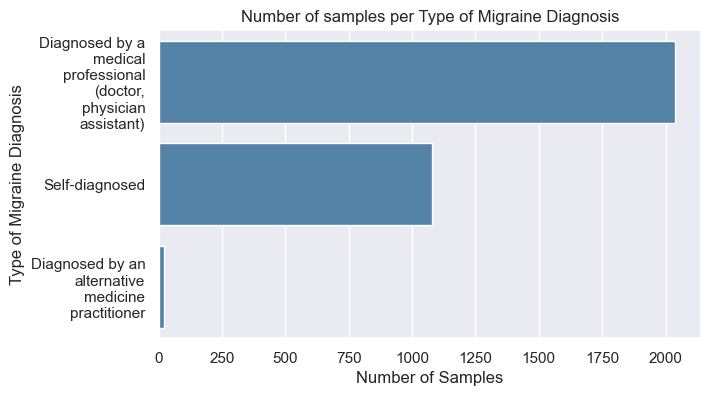

In [316]:
americangut_metadata_subset_migraine = americangut_metadata_subset[americangut_metadata_subset['migraine_bool'] == "I suffer from migraine"]
grouped_data_c = americangut_metadata_subset_migraine.groupby(['migraine']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="migraine", 
                   x = 'nSamples',
                   color='steelblue')
plt.title(f'Number of samples per Type of Migraine Diagnosis')
ax.set(xlabel='Number of Samples', ylabel='Type of Migraine Diagnosis')
wrap_labels(ax, 15)
plt.show()

In [322]:
plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.countplot(data=americangut_metadata_subset_migraine,  
                   x = 'sex',
                   y = "x",
                   color='steelblue')
plt.title(f'Number of samples per Type of Migraine Diagnosis')
ax.set(xlabel='Number of Samples', ylabel='Type of Migraine Diagnosis')
wrap_labels(ax, 15)
plt.show()

ValueError: Cannot pass values for both `x` and `y`

<Figure size 700x400 with 0 Axes>

In [326]:
# Print the number of samples per migraine condition
print(americangut_metadata_subset.groupby(['migraine']).size())
# Print the number of samples per migrain_bool
print(americangut_metadata_subset.groupby(['migraine_bool']).size())
# Print the number of samples per migrain_bool
print(americangut_metadata_subset.groupby(['migraine_bool', 'sex']).size())

migraine
Diagnosed by a medical professional (doctor, physician assistant)     2038
Diagnosed by an alternative medicine practitioner                       22
I do not have this condition                                         17815
Self-diagnosed                                                        1078
dtype: int64
migraine_bool
I do not suffer from migraine    17815
I suffer from migraine            3138
dtype: int64
migraine_bool                  sex   
I do not suffer from migraine  female    8741
                               male      8698
I suffer from migraine         female    2187
                               male       914
dtype: int64


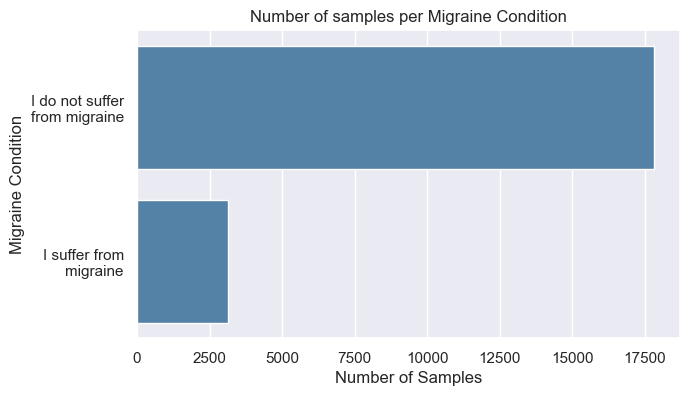

In [313]:
grouped_data_c = americangut_metadata_subset.groupby(['migraine_bool']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="migraine_bool", 
                   x = 'nSamples',
                   color='steelblue')
plt.title(f'Number of samples per Migraine Condition')
ax.set(xlabel='Number of Samples', ylabel='Migraine Condition')
wrap_labels(ax, 15)
plt.show()

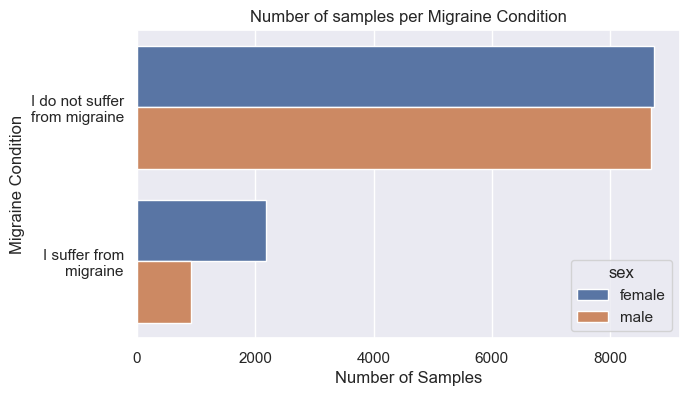

In [325]:
grouped_data_c = americangut_metadata_subset.groupby(['migraine_bool', 'sex']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="migraine_bool", 
                   x = 'nSamples',
                   hue = 'sex',
                   palette=["C0", "C1"])
plt.title(f'Number of samples per Migraine Condition')
ax.set(xlabel='Number of Samples', ylabel='Migraine Condition')
wrap_labels(ax, 15)
plt.show()

<Figure size 700x700 with 0 Axes>

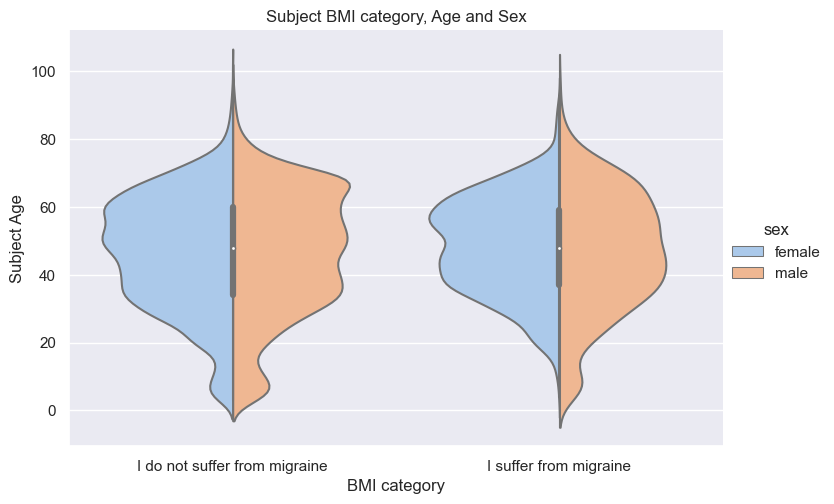

In [305]:
sns.set(style='darkgrid')
plt.figure(figsize=(7, 7), facecolor=None)
ax = sns.catplot(data=americangut_metadata_subset, 
            x="migraine_bool", 
            y="age_corrected", 
            hue="sex", 
            kind="violin",
            split = True,
            palette="pastel",
            height=5,
            aspect=1.5)
plt.title(f'Subject BMI category, Age and Sex')
ax.set(xlabel='BMI category', ylabel='Subject Age')
plt.show()

<Figure size 700x700 with 0 Axes>

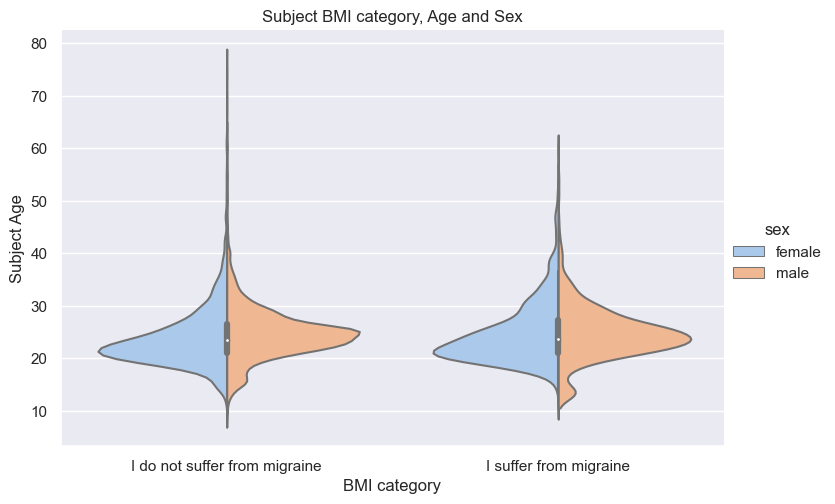

In [306]:
sns.set(style='darkgrid')
plt.figure(figsize=(7, 7), facecolor=None)
ax = sns.catplot(data=americangut_metadata_subset, 
            x="migraine_bool", 
            y="bmi_corrected", 
            hue="sex", 
            kind="violin",
            split = True,
            palette="pastel",
            height=5,
            aspect=1.5)
plt.title(f'Subject BMI category, Age and Sex')
ax.set(xlabel='BMI category', ylabel='Subject Age')
plt.show()

## Migraine e GI diseases

### IBD

In [331]:
print(americangut_metadata_subset.groupby(['ibd_bool']).size())

ibd_bool
I do not have IBD    19660
I have IBD            1163
dtype: int64


In [ ]:
americangut_metadata_subset_migraine
ibd_diagnosis_refined

In [338]:
# print the number of samples per IBD diagnosis
print(len(americangut_metadata_subset_migraine))
print(americangut_metadata_subset_migraine.groupby(['ibd_diagnosis_refined']).size())
# print the number of samples per IBD diagnosis
print(americangut_metadata_subset_migraine.groupby(['ibd_bool']).size())
#print(americangut_metadata_subset_migraine.groupby(['ibd_diagnosis']).size())
print(americangut_metadata_subset_migraine.groupby(['ibs_bool']).size())
print(americangut_metadata_subset_migraine.groupby(['gluten']).size())

3138
ibd_diagnosis_refined
Colonic Crohn's Disease               8
Ileal Crohn's Disease                 9
Ileal and Colonic Crohn's Disease     5
Microcolitis                         11
Ulcerative colitis                   35
dtype: int64
ibd_bool
I do not have IBD    2846
I have IBD            188
dtype: int64
ibs_bool
I do not have IBD    2049
I have IBD           1015
dtype: int64
gluten
Celiac disease                        69
Gluten Allergy (anti-gluten IgG)     164
Gluten sensitivity                   553
I consume fermented foods           2238
dtype: int64


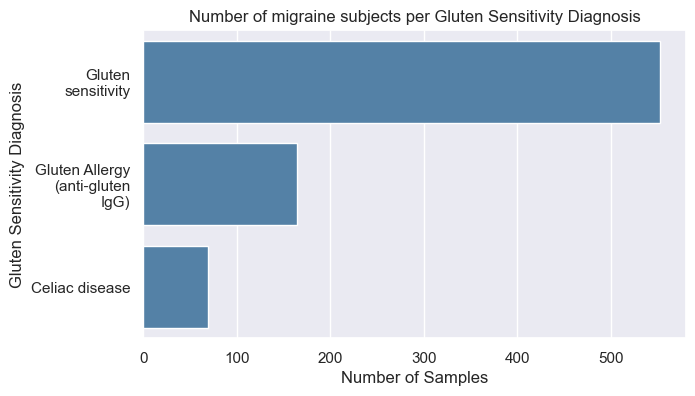

In [348]:
plt.rcParams.update({'font.size': 22})
grouped_data_c = americangut_metadata_subset_migraine[americangut_metadata_subset_migraine['gluten'] != "I consume fermented foods"].groupby(['gluten']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="gluten", 
                   x = 'nSamples',
                   color='steelblue')
plt.title(f'Number of migraine subjects per Gluten Sensitivity Diagnosis')
ax.set(xlabel='Number of Samples', ylabel='Gluten Sensitivity Diagnosis')
wrap_labels(ax, 15)
plt.show()

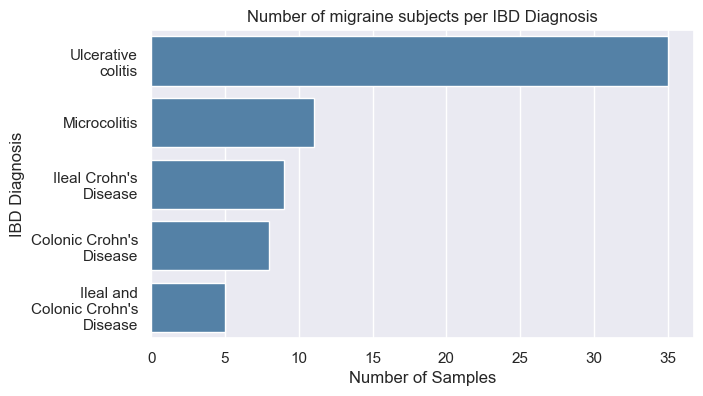

In [349]:
grouped_data_c = americangut_metadata_subset_migraine.groupby(['ibd_diagnosis_refined']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="ibd_diagnosis_refined", 
                   x = 'nSamples',
                   color='steelblue')
plt.title(f'Number of migraine subjects per IBD Diagnosis')
ax.set(xlabel='Number of Samples', ylabel='IBD Diagnosis')
wrap_labels(ax, 15)
plt.show()

## Migraine and supplements

In [350]:
print(americangut_metadata_subset.dtypes)

sample_name                   object
anonymized_name               object
age_cat                     category
age_corrected                float64
race                          object
scientific_name               object
env_package                   object
sex                           object
bmi                          float64
bmi_cat                     category
bmi_corrected                float64
country                       object
level_of_education          category
collection_date               object
probiotic_frequency         category
migraine                      object
antibiotic_history          category
fermented_frequency         category
fermented_increased           object
ibd                           object
ibd_diagnosis                 object
ibd_diagnosis_refined         object
ibs                           object
gluten                        object
migraine_bool                 object
ibd_bool                      object
ibs_bool                      object
p

In [353]:
print(americangut_metadata_subset_migraine.groupby(['probiotic_frequency_bool']).size())
print(americangut_metadata_subset_migraine.groupby(['fermented_frequency_bool']).size())

probiotic_frequency_bool
I assume probiotics           1942
I do not assume probiotics    1160
dtype: int64
fermented_frequency_bool
I consume fermented foods           61
I do not consume fermented foods    18
dtype: int64


In [352]:
# print the number of samples per IBD diagnosis
print(len(americangut_metadata_subset_migraine))
print(americangut_metadata_subset_migraine.groupby(['probiotic_frequency']).size())
# print the number of samples per IBD diagnosis
#print(americangut_metadata_subset_migraine.groupby(['ibd_diagnosis']).size())
print(americangut_metadata_subset_migraine.groupby(['fermented_frequency']).size())
print(americangut_metadata_subset_migraine.groupby(['fermented_increased']).size())
print(americangut_metadata_subset_migraine.groupby(['antibiotic_history']).size())

3138
probiotic_frequency
Never                            1160
Rarely (a few times/month)        746
Occasionally (1-2 times/week)     303
Regularly (3-5 times/week)        344
Daily                             549
dtype: int64
fermented_frequency
Never                            18
Rarely (a few times/month)       14
Occasionally (1-2 times/week)    16
Regularly (3-5 times/week)       16
Daily                            15
dtype: int64
fermented_increased
6 months                          18
I have not increased my intake    22
Month                             13
Year                              18
dtype: int64
antibiotic_history
Week                                                63
Month                                              142
6 months                                           445
Year                                               521
I have not taken antibiotics in the past year.    1942
dtype: int64


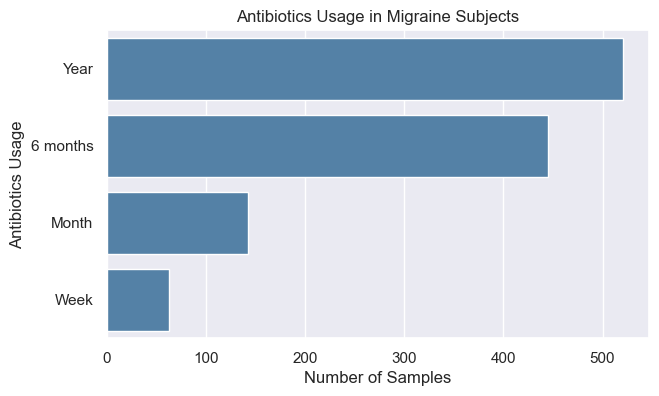

In [359]:
grouped_data_c = americangut_metadata_subset_migraine[americangut_metadata_subset_migraine['antibiotic_history'] != 'I have not taken antibiotics in the past year'].groupby(['antibiotic_history']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="antibiotic_history", 
                   x = 'nSamples',
                   color='steelblue',
                   order = ['Year', '6 months', 'Month', 'Week'])
plt.title(f'Antibiotics Usage in Migraine Subjects')
ax.set(xlabel='Number of Samples', ylabel='Antibiotics Usage')
wrap_labels(ax, 15)
plt.show()

In [ ]:
grouped_data_c = americangut_metadata_subset_migraine.groupby(['probiotic_frequency']).size().reset_index(name='nSamples')
top_10_c = grouped_data_c.nlargest(6, 'nSamples')

plt.figure(figsize=(7, 4), facecolor=None)
sns.set(style='darkgrid')
ax = sns.barplot(data=top_10_c, 
                   y="probiotic_frequency", 
                   x = 'nSamples',
                   color='steelblue',
                   order= ['Never', 'Rarely (a few times/month)', 'Daily', 'Regularly (3-5 times/week)', 'Occasionally (1-2 times/week)'])
plt.title(f'Probiotics Supplements Usage in Migraine Subjects')
ax.set(xlabel='Number of Samples', ylabel='Probiotics Supplements Usage')
wrap_labels(ax, 15)
plt.show()